## 广播

### 广播简介


二进制运算操作是通过一个元素一个元素进行的

In [1]:
import numpy as np
a = np.array([0,1,2])
b = np.array([5,5,5])
print(a+b)

[5 6 7]


广播可以操作不同sizes的array

In [2]:
a+5

array([5, 6, 7])

广播可以拉伸和去重数组

In [5]:
# 一维的a被拉伸后和M匹配，然后相加
M = np.ones((3,3))
print(M+a)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


广播也可以用于多个多为矩阵

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [7]:
# 这里可以同时对a和b进行拉伸，然后匹配共同的shape
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


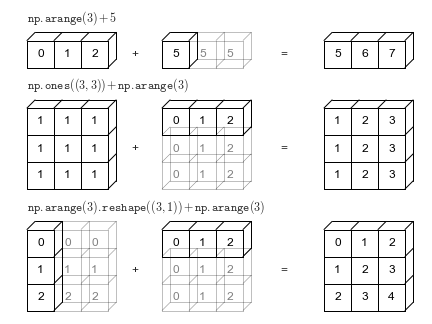

### 广播的规则
1. 如果两个数组的维度不同，低维度数组的形状会在最左边加上1
2. 如果两个数组在任何维度都不匹配，那么数组的形状会沿着为1的维度延展以匹配另一个数组
3. 如果任意维度的size都不匹配且不等于1，报错

In [9]:
# 示例1
M = np.ones((2,3))
a = np.arange(3)

M.shape = (2,3)  
a.shape = (3, )

rule1:

M.shape -> (2,3)  
a.shape -> (1,3)

rule2:
    
M.shape -> (2,3)  
a.shape -> (2,3)


In [11]:
print(M+a)

[[1. 2. 3.]
 [1. 2. 3.]]


In [12]:
# 示例2
a = np.arange(3).reshape((3,1))
b = np.arange(3)

a.shape = (3,1)  
b.shape = (3,)

rule1:

a.shape => (3,1)  
b.shape => (1,3)

rule2:

a.shape => (3,3)  
b.shape => (3,3)


In [13]:
print(a +b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [14]:
# 示例3
M = np.ones((3,2))
a = np.arange(3)


M.shape = (3,2)  
a.shape = (3, )

rule1:

M.shape => (3,2)
a.shape => (1,3)

M.shape => (3,2)  
a.shape => (3,3)

rule3:

raise a error



In [16]:
M+a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## 广播的练习

### 居中排列

In [3]:
X = np.random.random((10, 3))
print(X)

[[0.84359335 0.51224822 0.77158188]
 [0.71563383 0.93920993 0.30111699]
 [0.16909201 0.97315849 0.32500746]
 [0.80060125 0.40472731 0.13487575]
 [0.66456021 0.75957203 0.69629528]
 [0.79077912 0.84506773 0.78976295]
 [0.89443048 0.56068553 0.12508963]
 [0.50343115 0.85109511 0.7553706 ]
 [0.01766679 0.12631641 0.91427847]
 [0.37375403 0.80350516 0.63357646]]


In [4]:
Xmean = X.mean(0)
print(Xmean)

[0.57735422 0.67755859 0.54469555]


In [7]:
X_centered = X - Xmean
print(X_centered)
print(X_centered.mean(0))

[[ 0.26623913 -0.16531038  0.22688633]
 [ 0.1382796   0.26165134 -0.24357856]
 [-0.40826221  0.2955999  -0.21968809]
 [ 0.22324703 -0.27283128 -0.4098198 ]
 [ 0.08720599  0.08201344  0.15159973]
 [ 0.2134249   0.16750913  0.2450674 ]
 [ 0.31707625 -0.11687306 -0.41960591]
 [-0.07392307  0.17353652  0.21067505]
 [-0.55968743 -0.55124218  0.36958293]
 [-0.20360019  0.12594657  0.08888092]]
[-8.88178420e-17 -5.55111512e-17  3.33066907e-17]


### Plotting a two-dimensional function

In [13]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:,np.newaxis]
print(x)
print(y)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[[0.        ]
 [0.10204082]
 [0.20408163]
 [0.30612245]
 [0.40816327]
 [0.51020408]
 [0.6122449 ]
 [0.71428571]
 [0.81632653]
 [0.91836735]
 [1.02040816]
 [1.12244898]
 [1.2244898 ]
 [1.32653061]
 [1.42857143]
 [1.53061224]
 [1.63265306]
 [1.73469388]
 [1.83673469]
 [1.93877551]
 [2.04081633]
 [2.14285714]
 [2.24489796]
 [2.34693878]
 [2.44897959]
 [2.55102041]
 [2.65306122]
 [2.75510204]
 [2.85714286]
 [2.95918367]
 [3.06122449]
 [3.16

In [18]:
z = np.sin(x) ** 10 + np.cos(10+y*x) *np.cos(x)
print(z)


[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.82902677 -0.8103873  ...  0.92522407  0.75321348
   0.52508175]
 [-0.83907153 -0.82325668 -0.79876457 ...  0.96427357  0.84172689
   0.66446403]
 ...
 [-0.83907153 -0.48233077 -0.01646558 ...  0.96449925  0.75196531
   0.41982581]
 [-0.83907153 -0.47324558  0.00392612 ...  0.92542163  0.68540362
   0.37440839]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]]


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt


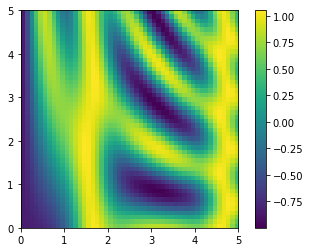

In [22]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],cmap='viridis')
plt.colorbar()